# Desafíos Prácticas 2022 Uplanner



## DESAFÍO 2
**1. Entender y trabajar con una base de datos**



Lo primero es conectar con la base de datos y almacenarlas en data frames:

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import sqlalchemy 
from sqlalchemy import create_engine

# Creamos la conexión
cnx = sqlite3.connect('database_challenge.db')

# Almacenamos la base de datos en data frames para luego considerar solo los datos activos
# Además renombramos algunos campos para luego poder unir todo de forma directa


df_enrollments = pd.read_sql_query("SELECT * FROM reg_enrollments", cnx)
df_enr=df_enrollments.loc[df_enrollments.loc[:, 'is_active'] == 1].drop('is_active', axis=1)


df_enrollment_statuses = pd.read_sql_query("SELECT * FROM upl_enrollment_statuses", cnx)
df_enr_sta=df_enrollment_statuses.loc[df_enrollment_statuses.loc[:, 'is_active'] == 1].drop(['is_active','ds_name','ds_integrationId'], axis=1)
df_enr_sta = df_enr_sta.rename(columns={'id_code': 'id_status'})


df_students = pd.read_sql_query("SELECT * FROM upl_students", cnx)
df_stu=df_students.loc[df_students.loc[:, 'is_active'] == 1].drop(columns='is_active')
df_stu = df_stu.rename(columns={'id_code': 'id_student','ds_integrationId':'student_integrationId'})


df_campuses = pd.read_sql_query("SELECT * FROM upl_campuses", cnx)
df_cam=df_campuses.loc[df_campuses.loc[:, 'is_active'] == 1].drop('is_active', axis=1)
df_cam = df_cam.rename(columns={'id_code': 'id_campus','ds_integrationId':'campus_integrationId','ds_name':'campus_name'})


df_courses = pd.read_sql_query("SELECT * FROM upl_courses", cnx)
df_cou=df_courses.loc[df_courses.loc[:, 'is_active'] == 1].drop('is_active', axis=1)
df_cou = df_cou.rename(columns={'id_code': 'id_course','ds_name':'course_name','ds_integrationId':'course_integrationId'})

df_academicperiods = pd.read_sql_query("SELECT * FROM upl_academicperiods", cnx)
df_aca=df_academicperiods.loc[df_academicperiods.loc[:, 'is_active'] == 1].drop('is_active', axis=1)
df_aca = df_aca.rename(columns={'id_code': 'id_academicPeriod','ds_integrationId':'academic_integrationId','ds_name':'acadperiod_name'})



Ahora combinaremos cada dataframe para trabajar solo con uno



In [2]:

df_1=df_enr.merge(df_enr_sta, on='id_status', how='left')

df_2= df_1.merge(df_stu, on="id_student", how="left")

df_3= df_2.merge(df_cam, on="id_campus", how="left")

df_4= df_3.merge(df_cou, on="id_course", how="left")

df= df_4.merge(df_aca, on="id_academicPeriod", how="left")

df

id_code  id_student  id_campus  id_academicPeriod  id_course  \
0            1       10397          2                 13        127   
1            2       10397          2                 13       2352   
2            3       10397          2                 13        130   
3            4       10397          2                 13       2355   
4            5       10402          2                 13        127   
...        ...         ...        ...                ...        ...   
47653    47785       13471          4                  6        174   
47654    47786       13471          4                  6       4197   
47655    47787       13478          4                  6       1064   
47656    47788       13478          4                  6       4886   
47657    47789       13478          4                  6       1721   

       id_status ds_finalScore ds_description  is_approved  \
0              2           1.0      Reprobado            0   
1              2           1.0      Reprobado            0   
2              2           1.0      Reprobado            0   
3              2           1.0      Reprobado            0   
4              2           1.0      Reprobado            0   
...          ...           ...            ...          ...   
47653          1           5.5       Aprobado            1   
47654          1           5.9       Aprobado            1   
47655          1           5.4       Aprobado            1   
47656          1           4.3       Aprobado            1   
47657          1           5.4       Aprobado            1   

                 ds_names  ...                             course_name  \
0           Tamara Rachel  ...         Pensamiento Lã?Gico Matemã?Tico   
1           Tamara Rachel  ...         Pensamiento Lã?Gico Matemã?Tico   
2           Tamara Rachel  ...               Expresiã?N Oral Y Escrita   
3           Tamara Rachel  ...               Expresiã?N Oral Y Escrita   
4        Nicole Patricia   ...         Pensamiento Lã?Gico Matemã?Tico   
...                   ...  ...                                     ...   
47653         María Inés   ...                      Mecã?Nica De Rocas   
47654         María Inés   ...  Higiene Y Agentes Contamin De Los Alim   
47655  Daniela Alejandra   ...                            Farmacología   
47656  Daniela Alejandra   ...  Historia Arq. Ii (Edad Media Y Renac.)   
47657  Daniela Alejandra   ...                            Farmacología   

      nm_credits course_integrationId acadperiod_name ds_academicPeriodType  \
0              4               CRS126          20171S                     S   
1              8              CRS2351          20171S                     S   
2              4               CRS129          20171S                     S   
3              8              CRS2354          20171S                     S   
4              4               CRS126          20171S                     S   
...          ...                  ...             ...                   ...   
47653          4               CRS173          20142S                     S   
47654          4              CRS4196          20142S                     S   
47655          1              CRS1063          20142S                     S   
47656          6              CRS4885          20142S                     S   
47657          4              CRS1720          20142S                     S   

       nm_year nm_periodNumber dt_start_date dt_end_date  \
0         2017               1    2017-03-15  2017-07-15   
1         2017               1    2017-03-15  2017-07-15   
2         2017               1    2017-03-15  2017-07-15   
3         2017               1    2017-03-15  2017-07-15   
4         2017               1    2017-03-15  2017-07-15   
...        ...             ...           ...         ...   
47653     2014               2    2014-08-01  2014-12-01   
47654     2014               2    2014-08-01  2014-12-01   
47655     2014               2 

**2. Identificar patrones en los datos**

**a.** Suponiendo que la institución inicia su operación el año 2014, ¿Cómo varía la matrícula
de estudiantes a medida que pasa el tiempo?


In [3]:
#Creamos el dataframe grupo para trabajar solo son las columnas 'id_student' y 'academic_integrationId'
grupo=df[['id_student', 'academic_integrationId']]
    
grupo



id_student academic_integrationId
0           10397                 20171S
1           10397                 20171S
2           10397                 20171S
3           10397                 20171S
4           10402                 20171S
...           ...                    ...
47653       13471                 20142S
47654       13471                 20142S
47655       13478                 20142S
47656       13478                 20142S
47657       13478                 20142S

[47658 rows x 2 columns]

In [4]:
#Creamos una lista con los periodos academicos (notar que todos son de años mayores o igual al 2014)
list=grupo['academic_integrationId'].unique()

list.sort()

list

array(['20141S', '20142S', '20151S', '20152S', '20161S', '20162S',
       '20171S', '20172S', '20181S', '20182S'], dtype=object)

In [5]:
matriculas=[]
periodo=[]
c=0
#iteramos por la lista de los periodos para agregar a la lista de matriculas el numero por periodo
for i in list:
    periodo.append(i)
    matriculas.append((grupo[grupo['academic_integrationId'] == i]).count()[1])
    c=c+1
    
dataframedict={'Matrículas': matriculas ,'Periodo': periodo }
dataframe=pd.DataFrame(dataframedict)
dataframe

Matrículas Periodo
0        1911  20141S
1        1383  20142S
2        4075  20151S
3        3192  20152S
4        6350  20161S
5        4878  20162S
6        7221  20171S
7        5113  20172S
8        8116  20181S
9        5419  20182S

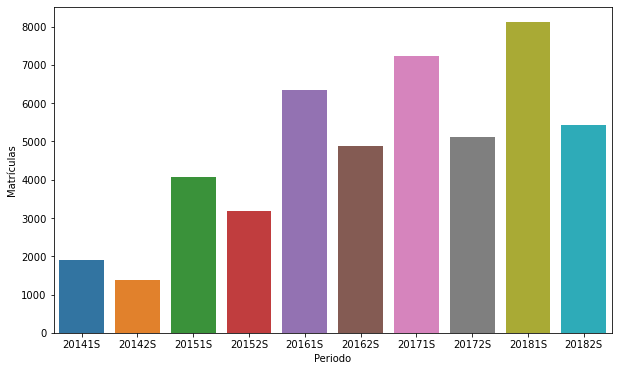

In [6]:
# graficamos para ver cuando varía la cantidad de matrículas a través de los periodos

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Periodo',
    y='Matrículas',
    data=dataframe 
)
plt.show()

Aquí podemos observar que la cantidad de matrículas en los semestres impares es siempre más alta que en los impares. Además a medida que pasan los periodos, las matrículas aumentan anualmente



**b.** Respecto a las inscripciones que realizan los estudiantes, ¿Cómo varía la cantidad
promedio de inscripciones que realizan los estudiantes en cada periodo académico?

In [7]:
group = df.groupby(['id_student','academic_integrationId'])
group1=group['course_integrationId'].count().reset_index()

group2 = group1.groupby('academic_integrationId').mean()
group2['Periodo'] = list
group2.rename({'course_integrationId': 'Inscripciones promedio'}, axis=1, inplace=True)
grupo1=group2.drop('id_student',axis=1)
grupo1.head(10)

Inscripciones promedio Periodo
academic_integrationId                                
20141S                                3.000000  20141S
20142S                                3.000000  20142S
20151S                                3.971735  20151S
20152S                                4.000000  20152S
20161S                                4.799698  20161S
20162S                                4.815400  20162S
20171S                                4.698113  20171S
20172S                                4.734259  20172S
20181S                                4.699479  20181S
20182S                                4.787102  20182S

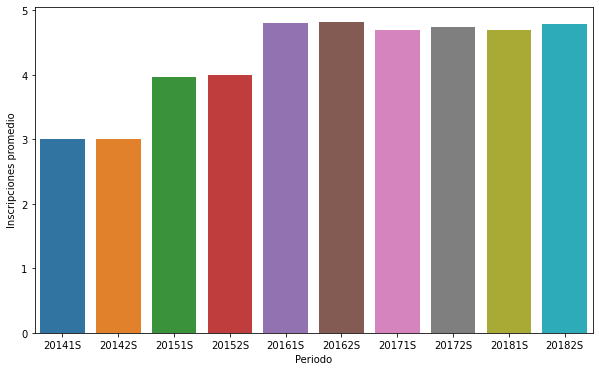

In [8]:
# graficamos para ver cuando varía la cantidad de matrículas a través de los periodos

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Periodo',
    y='Inscripciones promedio',
    data=group2 
)
plt.show()



A partir de este gráfico vemos que las inscripciones promedio por periodo se mantienen por año. Además observamos que entre los periodos 20161S y 20182S no hay grandes cambios en el promedio de inscripciones.


**c. Respecto a la aprobación de los cursos, identifica los 5 cursos con mayor tasa de
reprobación para el periodo 2015-1S.**



In [9]:
#Creamos un nuevo data frame que almacene solo la información del periodo 2015-1S
S12015 = df[df['academic_integrationId'] == '20151S'].sort_values(by='course_integrationId', ascending=False).reset_index()
#Creamos una lista con los cursos existentes
cursos= S12015['course_integrationId'].unique().tolist()


repro = []
curso = []
total = []
#Recorremos los cursos y almacenamos en listas el curso, su total de inscritos y el numero de reprobados
for i in cursos:
    x= S12015[S12015['course_integrationId'] == i]
    curso.append(i)
    t=x.count()[0]
    total.append(t)
    y= x[x['is_approved']==0].count()[0]
    repro.append(y)

#Creamos un data frame a base de un diccionario con las listas curso, total y repro
df_tasa=pd.DataFrame({'Curso':curso,'Total':total,'Reprobados':repro})
#Calculamos la tasa de reprobación
df_tasa['Tasa de reprobación']=df_tasa['Reprobados']/df_tasa['Total']
#Ordenamos de forma descendente
df_tasa1=df_tasa.sort_values(by='Tasa de reprobación',ascending=False)
#Mostramos las primeras 5 filas, que corresponden a los 5 cursos con mayor tasa de reprobación
df_tasa1.head(5)
    


Curso  Total  Reprobados  Tasa de reprobación
141  CRS1689     14          11             0.785714
127  CRS1990     10           7             0.700000
97   CRS2740     18          11             0.611111
135  CRS1729      9           5             0.555556
96   CRS2741     11           6             0.545455

Podemos observar que los 5 cursos con mayor tasa de reprobación son:
CRS1689
CRS1990
CRS2740
CRS1729
CRS2741